In [2]:
import os
import pandas as pd
from functions import functions
import utils

In [1]:
!ls

Untitled.ipynb               model_tweet.bin
__pycache__                  model_tweet.vec
data                         model_tweet_barbi.bin
etl.py                       model_tweet_barbi.vec
generate_bitcoin_file.py     predict.ipynb
generate_file.py             predict_2.py
generate_file_v2.py          predict_bitcoin.py
generate_refactor_bt_file.py tblob.py
main.py                      utils.py


In [30]:
df = pd.read_csv('data/sample.txt', sep='\t', encoding='ISO-8859-1')
df = df.drop_duplicates()
df.head()

,text,month,name,is_spam,is_news,sentiment,is_news_spam
0,@FinanceExaminer @michaeltg @TheBubbleBubble I...,5,Barbii,0,0,1,NaN
1,China Authorities Probe Alleged Illegal Bitcoi...,5,Barbii,0,1,-1,NaN
2,ALERT: Bitcoin Cash (BCH) at Euro 380.81 incre...,5,Barbii,0,1,1,NaN
3,Pretty cool concept. ð $CHR #crypto #crypt...,5,Barbii,1,NaN,NaN,NaN
4,"Crypto Market Hits $200 Billion, Bitcoin Ralli...",5,Barbii,1,NaN,NaN,NaN


### Reading Excel sample (both train and validation, model is already train)

In [31]:
df = df[['text', 'is_spam', 'is_news', 'sentiment']]
df.fillna(0, inplace = True)

utils.format_columns(df, 'sentiment')
utils.format_columns(df, 'is_news')

df.is_spam.value_counts()

0    980
1    519
Name: is_spam, dtype: int64

### Predict with model train with own text filterc

/Users/bsidoruk/Documents/MAESTRIA/project_1/venv_p/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


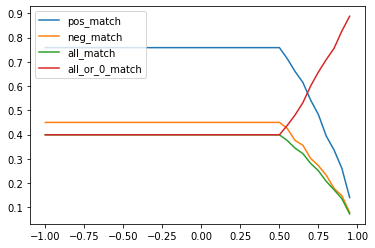

ratio_pos_match 0.7587939698492462, ratio_neg_match 0.4504950495049505
All coincidences: 0.39939024390243905
All coincidences_plus_0: 0.39939024390243905


In [32]:
import sys

sys.path.append("..")
from fastText.python.fasttext_module.fasttext.FastText import load_model

model_name = "model_tweet_barbi.bin"

model = load_model(model_name)

df_clean= df[df['is_spam'] == 0]
df_clean.sentiment.value_counts()
df_clean['text'] = df_clean['text'].apply(lambda x: functions.preprocess_barbi(x))

text_clean = df_clean['text'].tolist()
pred = model.predict(text_clean)

pred_r = utils.reformat_pred(pred, text_clean)
df_pred = pd.DataFrame(pred_r, columns = ['label','score','text'])
df_merge = pd.merge(df_clean, df_pred, on = 'text')

ones_match, zeros_match, all_match, all_or_0_match = utils.plot_results(df_merge)
df_merge, _, _, _, _ = utils.generate_scores(df_merge, thr=0)



In [33]:
from sklearn import metrics

# Print the precision and recall, among other metrics
print(metrics.classification_report(df_merge['sentiment'],df_merge['sentiment_pred'], digits=3))

print(metrics.accuracy_score(df_merge['sentiment'],df_merge['sentiment_pred']))
print(metrics.accuracy_score(df_merge['sentiment'],df_merge['sentiment_or_0_pred']))

              precision    recall  f1-score   support

        -1.0      0.306     0.450     0.365       202
         0.0      0.000     0.000     0.000       384
         1.0      0.440     0.759     0.557       398

    accuracy                          0.399       984
   macro avg      0.249     0.403     0.307       984
weighted avg      0.241     0.399     0.300       984

0.39939024390243905
0.39939024390243905


/Users/bsidoruk/Documents/MAESTRIA/project_1/venv_p/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Stay only with non spam samples and clean text (mauro)

/Users/bsidoruk/Documents/MAESTRIA/project_1/venv_p/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bsidoruk/Documents/MAESTRIA/project_1/venv_p/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


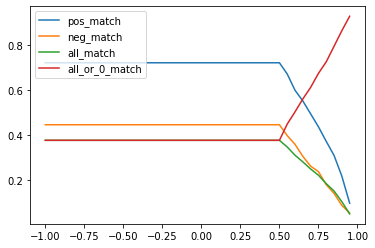

ratio_pos_match 0.7225, ratio_neg_match 0.44660194174757284
All coincidences: 0.37722772277227723
All coincidences_plus_0: 0.37722772277227723


In [34]:
df_clean= df[df['is_spam'] == 0]
df_clean.sentiment.value_counts()
df_clean['text'] = df_clean['text'].apply(lambda x: functions.normalizeForTokenization(x))

model_name = "model_tweet.bin"

model = load_model(model_name)

df_clean= df[df['is_spam'] == 0]
df_clean.sentiment.value_counts()
df_clean['text'] = df_clean['text'].apply(lambda x: functions.normalizeForTokenization(x))

text_clean = df_clean['text'].tolist()
pred = model.predict(text_clean)

pred_r = utils.reformat_pred(pred, text_clean)
df_pred = pd.DataFrame(pred_r, columns = ['label','score','text'])
df_merge = pd.merge(df_clean, df_pred, on = 'text')

ones_match, zeros_match, all_match, all_or_0_match = utils.plot_results(df_merge)
df_merge, _, _, _, _ = utils.generate_scores(df_merge, thr=0)

In [35]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(df_merge['sentiment'],df_merge['sentiment_pred'], digits=3))

print(metrics.accuracy_score(df_merge['sentiment'],df_merge['sentiment_pred']))
print(metrics.accuracy_score(df_merge['sentiment'],df_merge['sentiment_or_0_pred']))

              precision    recall  f1-score   support

        -1.0      0.280     0.447     0.345       206
         0.0      0.000     0.000     0.000       404
         1.0      0.424     0.723     0.534       400

    accuracy                          0.377      1010
   macro avg      0.235     0.390     0.293      1010
weighted avg      0.225     0.377     0.282      1010

0.37722772277227723
0.37722772277227723


/Users/bsidoruk/Documents/MAESTRIA/project_1/venv_p/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Pruebo con modelo simple

In [36]:
from textblob import TextBlob
    
    
df_clean= df[df['is_spam'] == 0]
df_clean['text'] = df_clean['text'].apply(lambda x: functions.preprocess_barbi(x))
text_clean = df_clean['text'].tolist()

blob_l =[]
for i,text in enumerate(text_clean):
    blob = TextBlob(text)
    blob_l.append(blob.sentiment.polarity)

df_clean['sentiment_blob'] = blob_l


/Users/bsidoruk/Documents/MAESTRIA/project_1/venv_p/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/bsidoruk/Documents/MAESTRIA/project_1/venv_p/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [37]:
utils.generate_scores_blob(df_clean, trh=0)


ratio_pos_match 0.4949748743718593, ratio_neg_match 0.0
All coincidences: 0.23979591836734693
All coincidences_plus_0: 0.23979591836734693


/Users/bsidoruk/Desktop/repos_barbi/TextMiningTP/sentiment/core/utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  (df['sentiment'] == 1)), 1, 0)
/Users/bsidoruk/Desktop/repos_barbi/TextMiningTP/sentiment/core/utils.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  (df['sentiment'] == -1)), 1, 0)
/Users/bsidoruk/Desktop/repos_barbi/TextMiningTP/sentiment/core/utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

(0.4949748743718593, 0.0, 0.23979591836734693, 0.23979591836734693)

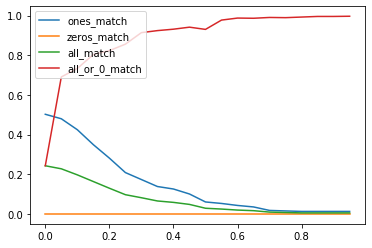

In [13]:
ones_match, zeros_match, all_match, all_or_0_match = utils.plot_results_glob(df_clean)

### Mal, voy con expresiones del set de train

In [ ]:
#### Predict twitter file

In [3]:
import sys
import numpy as np
from fastText.python.fasttext_module.fasttext.FastText import load_model
import pandas as pd 
import csv


df_1 = pd.read_csv(f'data/v1/05-tagged.csv.gz', compression='gzip', escapechar='\\', quotechar='"', encoding = "utf-8",  error_bad_lines=False, quoting=csv.QUOTE_NONNUMERIC, sep=";")
df_2 = pd.read_csv(f'data/v1/06-tagged.csv.gz', compression='gzip', escapechar='\\', quotechar='"', encoding = "utf-8",  error_bad_lines=False, quoting=csv.QUOTE_NONNUMERIC, sep=";")
df_3 = pd.read_csv(f'data/v1/07-tagged.csv.gz', compression='gzip', escapechar='\\', quotechar='"', encoding = "utf-8",  error_bad_lines=False, quoting=csv.QUOTE_NONNUMERIC, sep=";")
df_4 = pd.read_csv(f'data/v1/08-tagged.csv.gz', compression='gzip', escapechar='\\', quotechar='"', encoding = "utf-8",  error_bad_lines=False, quoting=csv.QUOTE_NONNUMERIC, sep=";")
df_5 = pd.read_csv(f'data/v1/09-tagged.csv.gz', compression='gzip', escapechar='\\', quotechar='"', encoding = "utf-8",  error_bad_lines=False, quoting=csv.QUOTE_NONNUMERIC, sep=";")
df_6 = pd.read_csv(f'data/v1/10-tagged.csv.gz', compression='gzip', escapechar='\\', quotechar='"', encoding = "utf-8",  error_bad_lines=False, quoting=csv.QUOTE_NONNUMERIC, sep=";")
df_7 = pd.read_csv(f'data/v1/11-tagged.csv.gz', compression='gzip', escapechar='\\', quotechar='"', encoding = "utf-8",  error_bad_lines=False, quoting=csv.QUOTE_NONNUMERIC, sep=";")



b'Skipping line 66486: expected 7 fields, saw 8\nSkipping line 74692: expected 7 fields, saw 8\nSkipping line 81031: expected 7 fields, saw 8\nSkipping line 106401: expected 7 fields, saw 8\nSkipping line 115416: expected 7 fields, saw 8\n'
b'Skipping line 343856: expected 7 fields, saw 8\n'
b'Skipping line 420963: expected 7 fields, saw 8\nSkipping line 450243: expected 7 fields, saw 8\nSkipping line 458995: expected 7 fields, saw 8\n'
b'Skipping line 551549: expected 7 fields, saw 9\nSkipping line 627480: expected 7 fields, saw 8\n'
b'Skipping line 997119: expected 7 fields, saw 8\n'
b'Skipping line 219684: expected 7 fields, saw 8\n'
b'Skipping line 677653: expected 7 fields, saw 8\nSkipping line 737175: expected 7 fields, saw 8\n'
b'Skipping line 790491: expected 7 fields, saw 8\n'
b'Skipping line 1162481: expected 7 fields, saw 8\nSkipping line 1168202: expected 7 fields, saw 8\n'
b'Skipping line 1350373: expected 7 fields, saw 8\n'
b'Skipping line 1683065: expected 7 fields, saw 

In [4]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7])

In [5]:
model_name = "model_tweet_barbi.bin"

model = load_model(model_name)


In [6]:
df= df[df['is_spam'] == 0]
len(df)

from tqdm import tqdm

In [7]:
tqdm.pandas()
df['text'] = df['text'].progress_apply(lambda x: functions.preprocess_barbi(x))

100%|██████████| 6364956/6364956 [04:07<00:00, 25713.27it/s]


In [8]:
text_clean = df['text'].tolist()


In [9]:
%%time
pred = model.predict(text_clean)


CPU times: user 1min 12s, sys: 5.65 s, total: 1min 18s
Wall time: 1min 24s


In [10]:
pred_r = utils.reformat_pred(pred, text_clean)


In [11]:
df_pred = pd.DataFrame(pred_r, columns = ['label','score','text'])


In [18]:
df_pred.head()

,label,score,text
0,__label__4,0.822302,bitcoin the one imv
1,__label__4,0.945552,bitcoin fudsters
2,__label__4,0.998661,"""banking bitcoin netflix."
3,__label__0,0.999039,$1000 left!
4,__label__0,0.612669,"never too late buy. the best timing buy $btc, ..."


In [20]:
df['label'] = df_pred['label']
df['score'] = df_pred['score']

In [28]:
def add_sentiment(df, thr):
    df['sentiment_pred_'+str(thr)] = np.where(((df['label'] == '__label__4')&
                                    (df['score'] > thr)),1,
                                    np.where(((df['label'] == '__label__0')&
                                                (df['score'] > thr)), -1, 0))

add_sentiment(df, 0)   
add_sentiment(df, 0.8)                                                    

In [31]:
df.head()

,date,text,language_proba,month,is_repeated,is_spam,is_news,label,score,sentiment_pred,sentiment_pred_0,sentiment_pred_0.8
0,2019-05-10,bitcoin the one imv,0.980272,5.0,False,False,False,__label__4,0.822302,1,1,1
1,2019-05-10,bitcoin fudsters,0.449887,5.0,False,False,True,__label__4,0.945552,1,1,1
2,2019-05-10,"""banking bitcoin netflix.",0.685419,5.0,False,False,False,__label__4,0.998661,1,1,1
3,2019-05-11,$1000 left!,0.247924,5.0,False,False,False,__label__0,0.999039,-1,-1,-1
4,2019-05-11,"never too late buy. the best timing buy $btc, ...",0.937032,5.0,False,False,False,__label__0,0.612669,-1,-1,0


In [33]:
for i_month in range(5, 12):
    df_month = df[df['month'] == i_month]

    # Guardamos el dataframe del mes actual
    df_month.to_csv(f'data/v2/{str(i_month).zfill(2)}-tagged_sentiment.csv.gz',
                    index = False, compression='gzip', escapechar='\\', quotechar='"', encoding = "utf-8",
                    quoting=csv.QUOTE_NONNUMERIC, sep=";")


In [ ]:
import re

def run_regex_pos(text):
    regex_pos = 0
    if re.match(r'btc.{0,10}(continues)?(still)?(price)?.{0,5}(climb|\bup\b|\brise|\brising|\bpump\bbrink|ð\x9f\x93\x88|ð\x9f\x9a\x80)',text):
        regex_pos = 1
    if re.match(r'(ð\x9f\x9a\x80|good|successful|profitable).{0,5}btc',text):
        regex_pos = 1
    return regex_pos 

def run_regex_neg(text):
    regex_neg = 0
    if re.match(r'btc.{0,5}(continues)?(still)?(price)?.{0,5}(down|\bsink|\brise|\brising|\bpump\bbrink)',text):
        regex_neg = 1
    if re.match(r'(bad|wrong).{0,5}btc',text):
        regex_neg = 1
    return regex_neg 


df_clean['text']= df_clean['text'].apply(lambda x: re.sub('(bitcoin|btc)','btc',x))
df_clean['regex_pos'] = df_clean['text'].apply(lambda x: run_regex_pos(x))
df_clean['regex_neg'] = df_clean['text'].apply(lambda x: run_regex_neg(x))

def preprocess_barbi(text: str) -> str:
    text = re.sub('(bitcoin|btc|)','btc',text)
    text = re.sub('@[^\s]+', '', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    # Remove usernames
    text = re.sub('@[^\s]+', '', text)
    # replace hashtags by just words
    text = re.sub(r'#([^\s]+)', r'\1', text)
    # correct all multiple white spaces to a single white space
    text = re.sub('[\s]+', ' ', text)
    # Additional clean up : removing words less than 2 chars, and remove space at the beginning and teh end
    text = re.sub(r'\W*\b\w{1,2}\b', '', text)
    text = text.strip()
    # Fast Text expected format
    return text